Матрица: A
Метод Данилевского
Теорема Виета выполнена.
Теорема Гершгорина выполнена.
Собственные векторы ортогональны.
Метод Крылова
Теорема Виета выполнена.
Теорема Гершгорина выполнена.
Собственные векторы ортогональны.
Рандомная матрица: (...)
Метод Данилевского
Теорема Виета выполнена.
Теорема Гершгорина выполнена.
Собственные векторы ортогональны.
Метод Крылова
Теорема Виета выполнена.
Теорема Гершгорина выполнена.
Собственные векторы ортогональны.


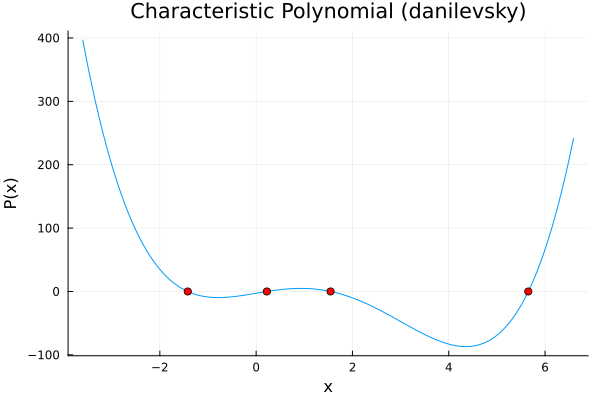

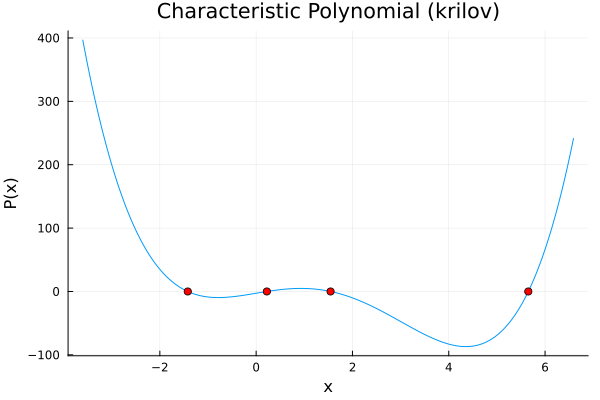

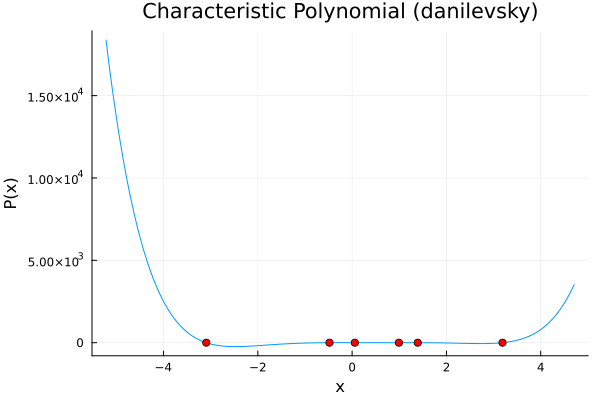

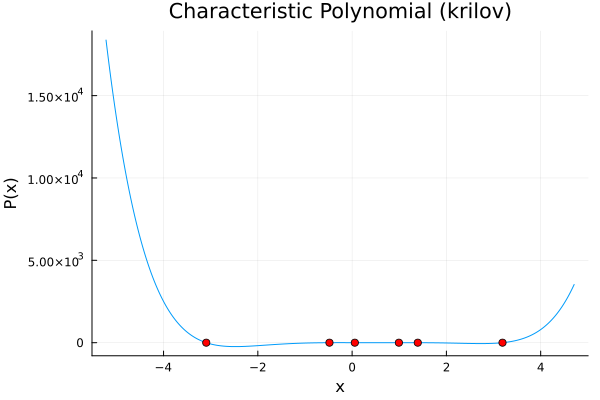

In [60]:
using LinearAlgebra
using Plots

function check_gershgorin(A::Matrix{Float64}, eigenvalues::Vector{Float64})
    n = size(A, 1)
    for λ in eigenvalues
        belongs_to_circle = false
        for i in 1:n
            center = A[i, i]
            radius = sum(abs(A[i, j]) for j in 1:n if j != i)
            if abs(λ - center) <= radius
                belongs_to_circle = true
                break
            end
        end
        if !belongs_to_circle
            return false
        end
    end
    return true
end

function check_vieta(A::Matrix{Float64}, eigenvalues::Vector{Float64})
    n = size(A, 1)

    eps = 1e-3

    sum_eigenvalues = sum(eigenvalues)
    trace_A = tr(A)
    sum_check = abs(sum_eigenvalues - trace_A) < eps

    product_eigenvalues = prod(eigenvalues)
    det_A = det(A)
    product_check = abs(product_eigenvalues - det_A) < eps

    return sum_check && product_check
end

function check_orthogonality(vectors)
    n = size(vectors, 2)
    for i in 1:n
        for j in i+1:n
            if abs(vectors[:, i] ⋅ vectors[:, j]) > 1e-6
                return false
            end
        end
    end
    return true
end

function danilevsky(A)
    n = size(A, 1)
    D = A
    Bs = I
    for i in 1:n-1
        B = Matrix{Float64}(I, n, n)
        B[n - i, :] = -D[n - i + 1, :] ./ D[n - i + 1,n - i]
        B[n - i, n - i] = 1 / D[n - i + 1, n - i] 
        C = D * B
        B_inv = Matrix{Float64}(I, n, n)
        B_inv[n - i, :] = D[n - i + 1, :]
        D = B_inv * C
        Bs *= B
    end
    return D, Bs
end

function characteristic_polynomial(x, coeffs)
    n = length(coeffs)
    return x^n + sum([coeffs[i] * x^(n-i) for i in 1:n])
end

function get_gershgorin_circles(A)
    R = [sum(abs.(A[i, :])) - abs(A[i, i]) for i in 1:size(A, 1)]
    intervals = [(A[i, i] - R[i], A[i, i] + R[i]) for i in 1:size(A, 1)]
    return intervals
end

function find_roots(f, search_interval)
    x_prev = search_interval[1]
    f_prev = f(x_prev)
    roots = []
    step = 1e-4
    eps = 1e-3
    for x in x_prev:step:search_interval[2]
        f_curr = f(x)        
        if f_prev * f_curr < 0
            root = bisection_method((x_prev, x), f, eps)
            push!(roots, root)
        end
        x_prev = x
        f_prev = f_curr
    end
    return roots 
end

function bisection_method(interval, f, eps)
    a, b = interval
    fa, fb = f(a), f(b)
    
    if fa * fb > 0
        error("err")
    end
    
    while abs(b - a) > eps
        mid = (a + b) / 2
        fmid = f(mid)
        
        if fmid == 0
            return mid
        elseif fa * fmid < 0
            b = mid
            fb = fmid
        else
            a = mid
            fa = fmid
        end
    end
    return (a + b) / 2
end

function get_interval(intervals)
    x_min, x_max = intervals[1][1], intervals[1][2]
    for interval in intervals[2:end]
        x_min = min(x_min, interval[1])
        x_max = max(x_max, interval[2])
    end
    return (x_min, x_max)
end

function find_eigenvectors(A, eigenvalues, B)
    n = size(A, 1)
    eigenvecs = []
    for eigenvalue in eigenvalues
        y = [eigenvalue^i for i in n-1:-1:0]
        ev = B*y
        push!(eigenvecs, ev/dot(ev,ev)^0.5)
    end
    return eigenvecs    
end

function random_symmetric_matrix(n::Int)
    A = randn(n, n)
    return (A + A') / 2
end

function gauss_classic(A, f)
    A_aug = hcat(A, f)
    n = size(A, 1)
    
    for i in 1:n
        pivot = A_aug[i, i]
        A_aug[i, :] /= pivot
        
        for j in i+1:n
            factor = A_aug[j, i]
            A_aug[j, :] -= factor * A_aug[i, :]
        end
    end

    x = zeros(n)
    for i in n:-1:1
        x[i] = A_aug[i, end] - A_aug[i, i+1:end-1]' * x[i+1:end]
    end
    
    return x
end

function danilevsky_calculate(A::Matrix{Float64})
    if A != A'
        error("Матрица должна быть симметричной")
    end

    D, B = danilevsky(A)
    p = (x) -> characteristic_polynomial(x, -D[1, :])
    intervals = get_gershgorin_circles(A)
    search_interval = get_interval(intervals)
    eigenvalues = Float64.(find_roots(p, search_interval))
    eigenvecs = find_eigenvectors(A, eigenvalues, B)

    if check_vieta(A, eigenvalues)
        println("Теорема Виета выполнена.")
    else
        println("Теорема Виета не выполнена.")
    end
    
    if check_gershgorin(A, eigenvalues)
        println("Теорема Гершгорина выполнена.")
    else
        println("Теорема Гершгорина не выполнена.")
    end
    
    if check_orthogonality(eigenvecs)
        println("Собственные векторы ортогональны.")
    else
        println("Собственные векторы не ортогональны.")
    end

    x_values = search_interval[1]:0.01:search_interval[2]
    y_values = [p(x) for x in x_values]
    plot(x_values, y_values, xlabel="x", ylabel="P(x)", title="Characteristic Polynomial (danilevsky)", legend=false)
    y_points = [p(x) for x in eigenvalues]
    display(scatter!(eigenvalues, y_points, color=:red, marker=:circle, label="Marked Points"))
end

function krilov_calculate(A::Matrix{Float64})
    if A != A'
        error("Матрица должна быть симметричной")
    end

    n = size(A, 1)

    y0 = [1.0; zeros(n-1)] 
    y_vectors = Vector{Vector{Float64}}()

    y_k = y0
    for k in 1:n
        y_k = A * y_k
        push!(y_vectors, y_k)
    end

    B = zeros(n, n)
    for i in 1:n
        for j in 1:(n-1)
            B[i, j] = y_vectors[n-j][i]
        end
        B[i, n] = y0[i]
    end

    b = y_vectors[end]

    p = gauss_classic(B, b)
    
    polynomial = (x) -> characteristic_polynomial(x, -p)
    intervals = get_gershgorin_circles(A)
    search_interval = get_interval(intervals)
    eigenvalues = Float64.(find_roots(polynomial, search_interval))

    eigenvecs = Vector{Vector{Float64}}()

    for i in 1:n
        q0 = 1 
        q = Vector{Float64}()

        q_k = q0
        for k in 1:(n-1)
            q_k = eigenvalues[i] * q_k - p[k]
            push!(q, q_k)
        end

        push!(eigenvecs, y_vectors[n-1] + sum(q[i] * y_vectors[n-i-1] for i in 1:(n-2)) + q[n-1] * y0)
    end

    eigenvecs = [vec / norm(vec) for vec in eigenvecs]
    
    if check_vieta(A, eigenvalues)
        println("Теорема Виета выполнена.")
    else
        println("Теорема Виета не выполнена.")
    end
    
    if check_gershgorin(A, eigenvalues)
        println("Теорема Гершгорина выполнена.")
    else
        println("Теорема Гершгорина не выполнена.")
    end
    
    if check_orthogonality(eigenvecs)
        println("Собственные векторы ортогональны.")
    else
        println("Собственные векторы не ортогональны.")
    end

    x_values = search_interval[1]:0.01:search_interval[2]
    y_values = [polynomial(x) for x in x_values]
    plot(x_values, y_values, xlabel="x", ylabel="P(x)", title="Characteristic Polynomial (krilov)", legend=false)
    y_points = [polynomial(x) for x in eigenvalues]
    display(scatter!(eigenvalues, y_points, color=:red, marker=:circle, label="Marked Points"))
end


A = [2.2 1.0 0.5 2.0; 
     1.0 1.3 2.0 1.0; 
     0.5 2.0 0.5 1.6; 
     2.0 1.0 1.6 2.0]

println("Матрица: A")
println("Метод Данилевского")
danilevsky_calculate(A)
println("Метод Крылова")
krilov_calculate(A)

random_matrix = random_symmetric_matrix(6)
println("Рандомная матрица: (...)")
println("Метод Данилевского")
danilevsky_calculate(random_matrix)
println("Метод Крылова")
krilov_calculate(random_matrix)